Sentimental Analysis

In [20]:
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,FullName,transcript
0,Aziz Ansari,sometimes i feel so happy sometimes i feel ...
1,Chris Rock,ladies and gentlemen chris rock yeah please...
2,Hannah Gadsby,the following is the transcript of hannah gadb...
3,Kenny Sebastian,make some noise for kenny sebastian oh my god ...
4,Kevin Hart,its showtime honey babe im gone coming al...
5,Nate Bargatze,family singin in the kitchen family ru...
6,Norm Macdonald,then people go goddamn at least hes not a hypo...
7,Russell Peters,narrator ladies and gentlemen its start time...
8,Vir Das,i lost of my mind its very freeing you should...
9,Whitney Cummings,ladies and gentlemen whitney cummings this is ...


Calculating Subjectivity, Polarity for each comedian
Subjectivity: How factual or opinionated a comedian is
0: fact
1: opinion

Polarity: How much positive or negative a comedian is
+1: positive
-1: negative
0: neutral

In [23]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,FullName,transcript,polarity,subjectivity
0,Aziz Ansari,sometimes i feel so happy sometimes i feel ...,0.084027,0.495528
1,Chris Rock,ladies and gentlemen chris rock yeah please...,0.017431,0.548388
2,Hannah Gadsby,the following is the transcript of hannah gadb...,0.059186,0.557084
3,Kenny Sebastian,make some noise for kenny sebastian oh my god ...,0.111493,0.581094
4,Kevin Hart,its showtime honey babe im gone coming al...,-0.009839,0.545018
5,Nate Bargatze,family singin in the kitchen family ru...,0.077874,0.486563
6,Norm Macdonald,then people go goddamn at least hes not a hypo...,0.088731,0.548895
7,Russell Peters,narrator ladies and gentlemen its start time...,0.031279,0.527236
8,Vir Das,i lost of my mind its very freeing you should...,0.098065,0.495276
9,Whitney Cummings,ladies and gentlemen whitney cummings this is ...,0.020734,0.559075


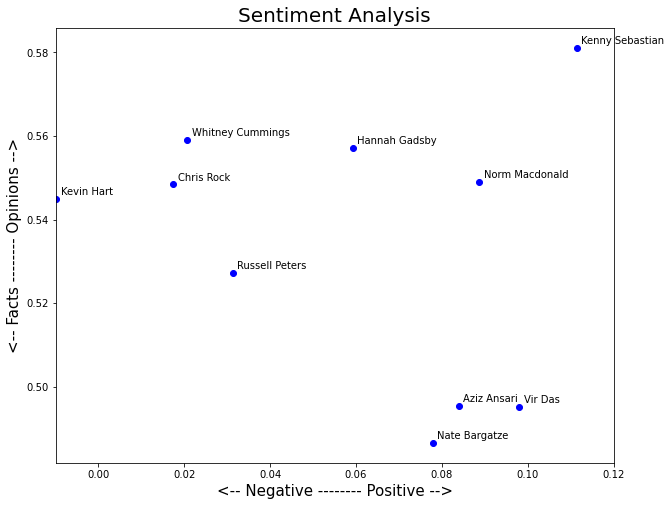

In [22]:
#Plotting each comedian on a Subjectivity/Polarity graph
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['FullName'][index], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

In [4]:
import numpy as np
import math

def split_text(text, n=10):
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [5]:
data

,FullName,transcript,polarity,subjectivity
0,Aziz Ansari,sometimes i feel so happy sometimes i feel ...,0.084027,0.495528
1,Chris Rock,ladies and gentlemen chris rock yeah please...,0.017431,0.548388
2,Hannah Gadsby,the following is the transcript of hannah gadb...,0.059186,0.557084
3,Kenny Sebastian,make some noise for kenny sebastian oh my god ...,0.111493,0.581094
4,Kevin Hart,its showtime honey babe im gone coming al...,-0.009839,0.545018
5,Nate Bargatze,family singin in the kitchen family ru...,0.077874,0.486563
6,Norm Macdonald,then people go goddamn at least hes not a hypo...,0.088731,0.548895
7,Russell Peters,narrator ladies and gentlemen its start time...,0.031279,0.527236
8,Vir Das,i lost of my mind its very freeing you should...,0.098065,0.495276
9,Whitney Cummings,ladies and gentlemen whitney cummings this is ...,0.020734,0.559075


In [6]:
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[[' sometimes i feel so happy   sometimes i feel so sad   sometimes i feel so happy   but mostly you just make me mad   baby you just make me mad   linger on   your pale blue eyes   linger on  aziz ansaris right now aziz ansari  thought of you as my mountaintop   thought of you as my peak  thought of you as everything ive had but couldnt keep ive had but couldnt keep thank you thank you very much thank you thanks i appreciate that thank you so much take a seat take a seat thanks so much wow what a nice welcome wow wow wow very excit by the way this guys with me hes uh hes authorized hes not like a very audacious bootlegger who really doesnt give a fuck you said no phones but what about fullon cameras uh yeah were filming these shows so you know you might be in the show uh when its on whatever i put it on youll be like oh shit i was there but were filming a few shows so if youre like the shitty crowd we wont use any of the footage um im psyched to be here iive been on the road for a whi

In [7]:
len(list_pieces)

10

In [8]:
len(list_pieces[0])

10

Dividing the set into 10 parts and calculating the subjectivity/polarity for each segment

In [9]:
polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.1440097402597403,
  0.0151529116045245,
  0.058423520923520905,
  0.025686299081035893,
  0.07750764964620381,
  0.14074960127591704,
  0.060614792404565104,
  0.14000254423938638,
  0.11625294536686942,
  0.09518041482327191],
 [-0.018988000303789776,
  0.024346726190476196,
  -0.01135382395382395,
  -0.15556387608806965,
  -0.022980093676814986,
  0.10111913679329408,
  0.04315873015873017,
  -0.009042526101349637,
  0.10638764880952381,
  0.09949350649350647],
 [0.12501174925703223,
  -0.0021445872721383035,
  0.14225040584415585,
  0.06893309999692977,
  0.1171979746444032,
  0.036984962406014996,
  -0.0397671831092884,
  0.07255336617405582,
  0.055931839402427644,
  0.026709778561630405],
 [0.26962547256664904,
  -0.07108111187058558,
  0.19597247990105135,
  0.1916111111111111,
  0.01823539448539448,
  -0.07326479076479077,
  0.2426835317460317,
  0.21374875124875128,
  0.04034391534391535,
  0.15836359967715902],
 [-0.08045326278659612,
  -0.05448300820136264,
  -0.08283374

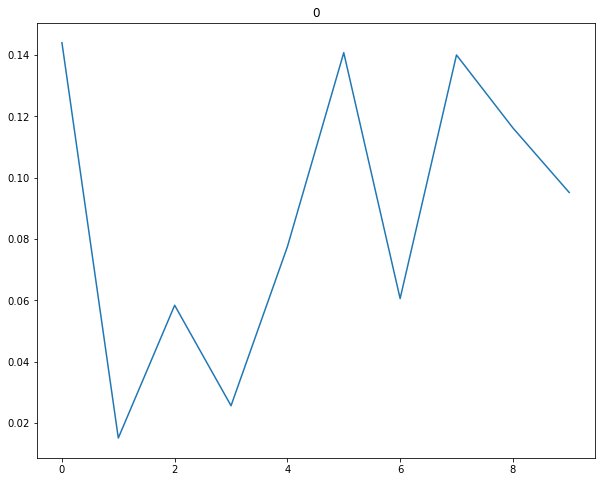

In [11]:
plt.plot(polarity_transcript[0])
plt.title(data['FullName'].index[0])
plt.show()

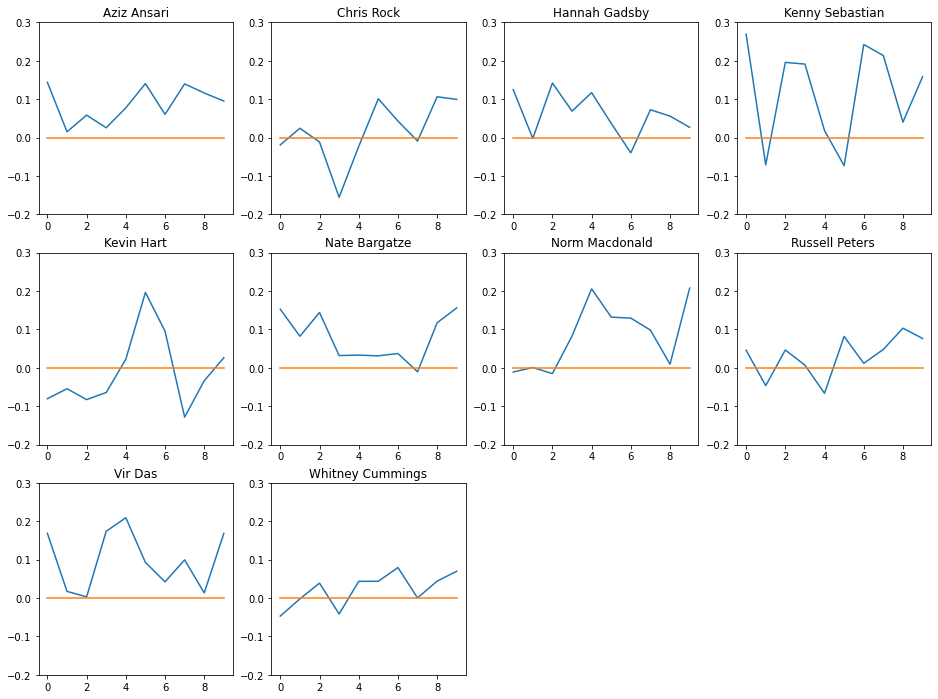

In [12]:
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['FullName'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

Classifying all comedian according to Polarity and Subjectivity.

In [30]:
positive=[]
negative=[]
for i in range(10):
    if data['polarity'][i] > 0:
        positive.append(data['FullName'][i])
    else:
        negative.append(data['FullName'][i])
print(positive)
print(negative)

['Aziz Ansari', 'Chris Rock', 'Hannah Gadsby', 'Kenny Sebastian', 'Nate Bargatze', 'Norm Macdonald', 'Russell Peters ', 'Vir Das', 'Whitney Cummings']
['Kevin Hart']


In [31]:
opininated=[]
subjective=[]
for i in range(10):
    if data['subjectivity'][i] > 0.5:
        opininated.append(data['FullName'][i])
    else:
        subjective.append(data['FullName'][i])
print(opininated)
print(subjective)

['Chris Rock', 'Hannah Gadsby', 'Kenny Sebastian', 'Kevin Hart', 'Norm Macdonald', 'Russell Peters ', 'Whitney Cummings']
['Aziz Ansari', 'Nate Bargatze', 'Vir Das']


Modifying the interval to 20 to see how the charts over time change and again classify all comedian according to Polarity and Subjectivity.

In [32]:
list_pieces = []
for t in data.transcript:
    split = split_text(t,20)
    list_pieces.append(split)
    
list_pieces

[[' sometimes i feel so happy   sometimes i feel so sad   sometimes i feel so happy   but mostly you just make me mad   baby you just make me mad   linger on   your pale blue eyes   linger on  aziz ansaris right now aziz ansari  thought of you as my mountaintop   thought of you as my peak  thought of you as everything ive had but couldnt keep ive had but couldnt keep thank you thank you very much thank you thanks i appreciate that thank you so much take a seat take a seat thanks so much wow what a nice welcome wow wow wow very excit by the way this guys with me hes uh hes authorized hes not like a very audacious bootlegger who really doesnt give a fuck you said no phones but what about fullon cameras uh yeah were filming these shows so you know you might be in the show uh when its on whatever i put it on youll be like oh shit i was there but were filming a few shows so if youre like the shitty crowd we wont use any of the footage um im psyched to be here iive been on the road for a whi

In [33]:
polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.10195845820845822,
  0.19370670995670994,
  -0.028467841682127404,
  0.03167710944026734,
  0.029227156771799618,
  0.10261261261261263,
  0.029769119769119737,
  0.02007242063492064,
  0.09302178318135762,
  0.05725308641975308,
  0.16785714285714284,
  0.11635281385281383,
  0.03150730519480519,
  0.08487103174603174,
  0.16959345002823262,
  0.11222332656006123,
  0.11055936920222635,
  0.1207819264069264,
  0.18576479076479074,
  0.03023312641237169],
 [0.01309346971111675,
  -0.04352620893318565,
  -0.00016369047619047353,
  0.04068700396825397,
  -0.04129088504088503,
  0.023789682539682565,
  -0.23025488400488403,
  -0.10162037037037035,
  0.11717171717171718,
  -0.1881590136054422,
  0.13878626163108918,
  0.022142857142857127,
  -0.09909812409812409,
  0.15493197278911566,
  0.05265845265845266,
  -0.061354225484660276,
  0.10404761904761903,
  0.10845238095238097,
  0.06576960076960074,
  0.16904761904761903],
 [0.13646825396825396,
  0.11311460974922513,
  -0.13903018278

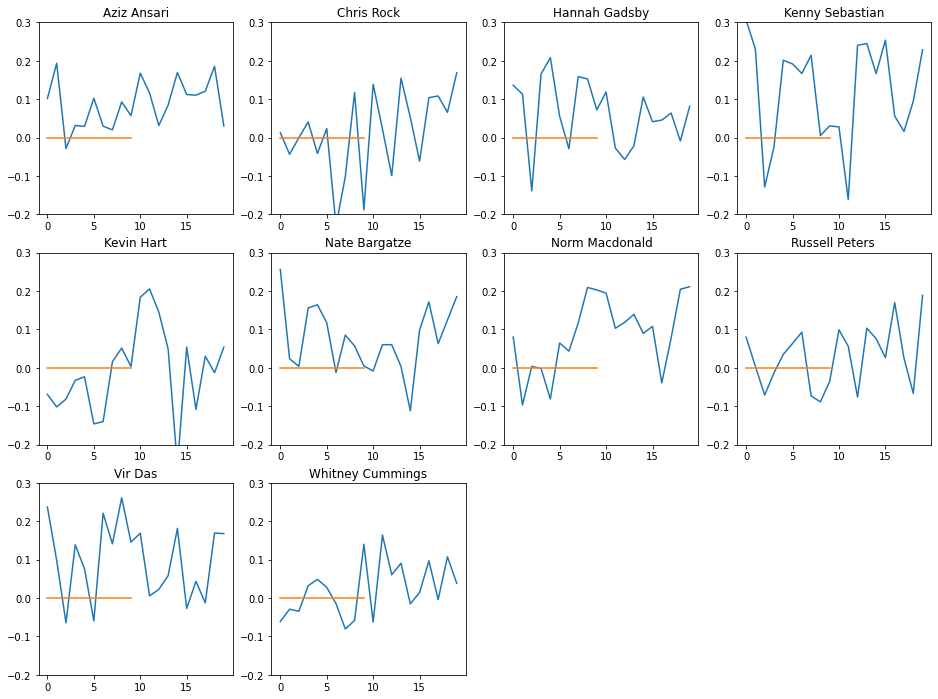

In [34]:
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['FullName'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()